In [18]:
from astropy.io import fits
import pandas as pd
from pandas import DataFrame,Series
import numpy as np
from scipy import stats
from scipy.stats import ks_2samp
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

%matplotlib inline

In [19]:
#del hosdf['Score']
#del hosdf['Percent']

In [20]:
#HoS Pre
hosprecor = fits.open('NSC306M-catS12-Pre-corr-anonp.fits')
hosprecor.close
data = hosprecor[1].data
anons = []
corrs = []
for record in data:
    anons.append(list(record)[0])
    corrs.append(list(record)[1])
hospredf = DataFrame(corrs, index = anons)
num = len(hospredf.columns)
hospredf['Score']=hospredf.sum(axis=1)
hospredf['Percent']=hospredf['Score']/num*100.
hospredf.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,Score,Percent
720593,1,0,1,0,0,1,0,1,1,1,...,1,0,1,0,0,1,0,1,19,47.5
304917,1,1,1,1,1,0,1,1,0,1,...,0,1,1,0,1,0,0,0,23,57.5
709488,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,30,75.0
743883,0,1,1,0,1,1,0,1,1,1,...,1,0,1,0,1,0,1,1,25,62.5
890246,1,1,1,0,1,1,1,1,1,1,...,1,1,1,0,1,1,1,0,32,80.0


In [21]:
#HoS Post
hospostcor = fits.open('NSC306M-catS12-Post-corr-anonp.fits')
hospostcor.close
data = hospostcor[1].data
anons = []
corrs = []
for record in data:
    anons.append(list(record)[0])
    corrs.append(list(record)[1])
hospostdf = DataFrame(corrs, index = anons)
num = len(hospostdf.columns)
hospostdf['Score']=hospostdf.sum(axis=1)
hospostdf['Percent']=hospostdf['Score']/num*100.
hospostdf.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,Score,Percent
720593,1,1,1,1,1,0,1,1,1,1,...,1,1,1,0,1,1,0,0,27,67.5
304917,1,1,0,0,1,0,0,1,0,1,...,1,1,1,0,1,1,0,1,30,75.0
709488,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,35,87.5
743883,1,1,1,0,1,1,1,1,1,1,...,1,1,1,0,1,0,1,1,33,82.5
890246,1,1,1,1,0,1,1,1,1,1,...,1,1,1,0,1,1,1,1,35,87.5


In [22]:
#AST Pre
astprecor = fits.open('ctrlAST-catS12-Pre-corr-anonp.fits')
astprecor.close
data = astprecor[1].data
anons = []
corrs = []
for record in data:
    anons.append(list(record)[0])
    corrs.append(list(record)[1])
astpredf = DataFrame(corrs, index = anons)
num = len(astpredf.columns)
astpredf['Score']=astpredf.sum(axis=1)
astpredf['Percent']=astpredf['Score']/num*100.
astpredf.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,Score,Percent
59834,1,1,0,1,0,1,0,1,1,1,...,0,1,1,0,0,1,1,1,24,60.0
6934,1,1,1,1,1,1,0,1,1,1,...,0,0,0,1,0,1,1,1,25,62.5
547019,1,1,1,0,1,1,0,0,1,1,...,1,1,1,0,1,1,0,0,27,67.5
758232,0,0,0,0,0,0,0,1,0,0,...,1,1,1,0,1,0,1,1,18,45.0
650189,1,0,1,0,0,1,0,0,0,1,...,1,1,1,0,0,1,1,1,24,60.0


In [23]:
#AST Post
astpostcor = fits.open('ctrlAST-catS12-Post-corr-anonp.fits')
astpostcor.close
data = astpostcor[1].data
anons = []
corrs = []
for record in data:
    anons.append(list(record)[0])
    corrs.append(list(record)[1])
astpostdf = DataFrame(corrs, index = anons)
num = len(astpostdf.columns)
astpostdf['Score']=astpostdf.sum(axis=1)
astpostdf['Percent']=astpostdf['Score']/num*100.
astpostdf.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,Score,Percent
59834,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
6934,0,1,1,0,1,1,0,1,1,1,...,1,1,0,0,1,1,1,0,27,67.5
547019,1,1,1,0,1,1,1,1,1,1,...,1,1,1,0,1,0,1,1,33,82.5
758232,1,1,1,0,0,0,1,1,1,1,...,1,1,0,0,1,0,1,1,28,70.0
650189,1,1,1,0,0,0,0,1,1,1,...,1,1,1,0,1,0,1,1,27,67.5


In [24]:
astpostdf.shape

(110, 42)

In [25]:
totHdf = DataFrame(hospredf[['Score','Percent']],index=hospredf.index)
totHdf.columns=['Pre','Pre100']
totHdf['Post']=hospostdf['Score']
totHdf['Post100']=hospostdf['Percent']
totHdf['Class']='HoS'
totHdf.head()

,Pre,Pre100,Post,Post100,Class
720593,19,47.5,27,67.5,HoS
304917,23,57.5,30,75.0,HoS
709488,30,75.0,35,87.5,HoS
743883,25,62.5,33,82.5,HoS
890246,32,80.0,35,87.5,HoS


In [26]:
totAdf = DataFrame(astpredf[['Score','Percent']],index=astpredf.index)
totAdf.columns=['Pre','Pre100']
totAdf['Post']=astpostdf['Score']
totAdf['Post100']=astpostdf['Percent']
totAdf['Class']='AST'
totAdf.head()

,Pre,Pre100,Post,Post100,Class
59834,24,60.0,0,0.0,AST
6934,25,62.5,27,67.5,AST
547019,27,67.5,33,82.5,AST
758232,18,45.0,28,70.0,AST
650189,24,60.0,27,67.5,AST


In [27]:
totdf = pd.concat([totHdf,totAdf])

/Users/migration/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:12: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/migration/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


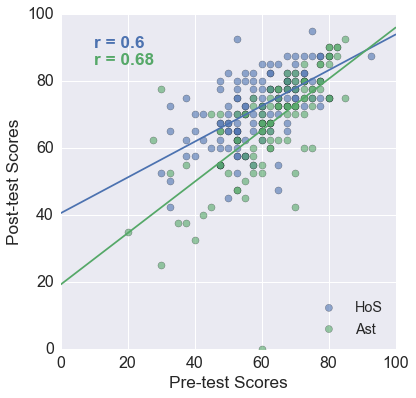

In [28]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
palette = sns.color_palette()
col1 = palette[0]
col2 = palette[1]
ax.scatter(totHdf['Pre100'],totHdf['Post100'],marker='o',s=50,c=col1,alpha=0.6,label='HoS')
ax.scatter(totAdf['Pre100'],totAdf['Post100'],marker='o',s=50,c=col2,alpha=0.6,label='Ast')

slope, intercept, r_value, p_value, std_err = stats.linregress(totHdf['Pre100'],totHdf['Post100'])
slopeA, interceptA, r_valueA, p_valueA, std_errA = stats.linregress(totAdf['Pre100'],totAdf['Post100'])
xx=range(101)
yy1 = slope*xx+intercept
yy2 = slopeA*xx+interceptA
ax.plot(xx,yy1,'-',c=col1)
ax.plot(xx,yy2,'-',c=col2)
rstr = 'r = '+str(round(r_value,2))
rstrA = 'r = '+str(round(r_valueA,2))
ax.text(10,90,rstr,fontsize='xx-large',color=col1,fontweight='bold')
ax.text(10,85,rstrA,fontsize='xx-large',color=col2,fontweight='bold')

ax.set_xlim(xmin=0, xmax=100)
ax.set_ylim(ymin=0, ymax=100)
ax.tick_params(labelsize=16)
ax.set_xlabel('Pre-test Scores',fontsize='xx-large')
ax.set_ylabel('Post-test Scores',fontsize='xx-large')
ax.legend(loc='lower right',fontsize='x-large')
fig.savefig('Prevpost.pdf')

# Overall Analysis

58.48790322580645 71.73387096774194


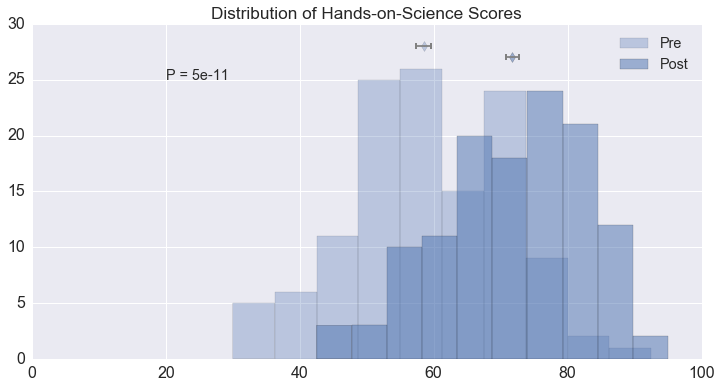

In [29]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
palette = sns.color_palette()
col = palette[0]
prey = 28
posty = 27

totHdf['Pre100'].hist(alpha=0.3,color=col,label='Pre',bins=10)
totHdf['Post100'].hist(alpha=0.5,color=col,label='Post',bins=10)
#plot means
ax.scatter(totHdf['Pre100'].mean(),prey,marker='d',s=50,c=col,alpha=0.3)
ax.scatter(totHdf['Post100'].mean(),posty,marker='d',s=50,c=col,alpha=0.5)
#plot stderrs
preerr = totHdf['Pre100'].std()/np.sqrt(len(totHdf['Pre100']))
posterr = totHdf['Post100'].std()/np.sqrt(len(totHdf['Post100']))
ax.errorbar(totHdf['Pre100'].mean(), prey, xerr=preerr, fmt='.',markersize=1,c='gray',capthick=2)
ax.errorbar(totHdf['Post100'].mean(), posty, xerr=posterr, fmt='.',markersize=1,c='gray',capthick=2)
print(totHdf['Pre100'].mean(),totHdf['Post100'].mean())
#plot KS prob
KShos = ks_2samp(totHdf['Pre100'],totHdf['Post100'])
KSstr = 'P = %.1g' % KShos[1]
ax.text(20,25,KSstr,fontsize='x-large')

ax.set_xlim(xmin=0, xmax=100)
ax.set_ylim(ymin=0, ymax=30)
ax.tick_params(labelsize=16)
ax.set_title('Distribution of Hands-on-Science Scores',fontsize='xx-large')
ax.legend(fontsize='x-large')
fig.savefig('qALLhoshist.pdf')

In [30]:
print(totHdf['Pre100'].mean(),totHdf['Post100'].mean())
print(totAdf['Pre100'].mean(),totAdf['Post100'].mean())

58.48790322580645 71.73387096774194
62.68181818181818 67.31818181818181


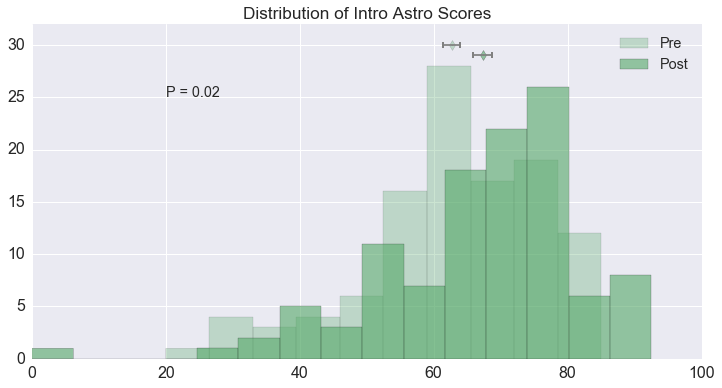

In [31]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
palette = sns.color_palette()
col = palette[1]
prey = 30
posty = 29

totAdf['Pre100'].hist(alpha=0.3,color=col,label='Pre',bins=10)
totAdf['Post100'].hist(alpha=0.6,color=col,label='Post',bins=15)

#plot means
ax.scatter(totAdf['Pre100'].mean(),prey,marker='d',s=50,c=col,alpha=0.3)
ax.scatter(totAdf['Post100'].mean(),posty,marker='d',s=50,c=col,alpha=0.6)
#plot stderrs
preerr = totAdf['Pre100'].std()/np.sqrt(len(totAdf['Pre100']))
posterr = totAdf['Post100'].std()/np.sqrt(len(totAdf['Post100']))
ax.errorbar(totAdf['Pre100'].mean(), prey, xerr=preerr, fmt='.',markersize=1,c='gray',capthick=2)
ax.errorbar(totAdf['Post100'].mean(), posty, xerr=posterr, fmt='.',markersize=1,c='gray',capthick=2)
#plot KS prob
KSast = ks_2samp(totAdf['Pre100'],totAdf['Post100'])
KSstr = 'P = %.1g' % KSast[1]
ax.text(20,25,KSstr,fontsize='x-large')

ax.set_xlim(xmin=0, xmax=100)
ax.set_ylim(ymin=0, ymax=32)
ax.tick_params(labelsize=16)
ax.set_title('Distribution of Intro Astro Scores',fontsize='xx-large')
ax.legend(fontsize='x-large')
fig.savefig('qALLasthist.pdf')

In [32]:
ghos = (totHdf['Post100']-totHdf['Pre100'])/(100-totHdf['Pre100'])
gast = (totAdf['Post100']-totAdf['Pre100'])/(100-totAdf['Pre100'])

In [33]:
print(ghos.mean(),gast.mean())

0.3012479708314608 0.117753012016503


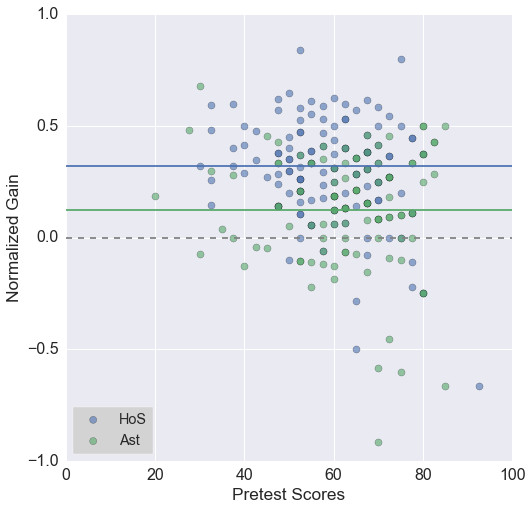

In [34]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
palette = sns.color_palette()
col = palette[1]
prey = 30
posty = 29

#plot individual <g>
ax.scatter(totHdf['Pre100'],ghos,marker='o',s=50,c=palette[0],alpha=0.6,label='HoS')
ax.scatter(totAdf['Pre100'],gast,marker='o',s=50,c=palette[1],alpha=0.6,label='Ast')
#plot mean <g> per sample

ax.axhline(0,color='gray',ls='--')
ax.axhline((totHdf['Post100'].mean()-totHdf['Pre100'].mean())/(100-totHdf['Pre100'].mean()),color=palette[0],ls='-')
ax.axhline((totAdf['Post100'].mean()-totAdf['Pre100'].mean())/(100-totAdf['Pre100'].mean()),color=palette[1],ls='-')

ax.set_xlim(xmin=0, xmax=100)
ax.set_ylim(ymin=-1, ymax=1)
ax.tick_params(labelsize=16)
ax.set_xlabel('Pretest Scores',fontsize='xx-large')
ax.set_ylabel('Normalized Gain',fontsize='xx-large')
legend = ax.legend(loc='lower left',fontsize='x-large',frameon=True)
frame = legend.get_frame()
frame.set_facecolor('lightgray')
fig.savefig('qALLg.pdf')

# Covered Questions

In [35]:
#questions sorted by topic (in 40Q numbering), minus 1 to conv to zero index
light = np.array([27,28,29])-1
scale = np.array([9,10,12,17,18,19,21,24])-1
sky = np.array([4,5,7,11,14,20])-1
seasons = np.array([1,16,33])-1
phases = np.array([2,13,25,26])-1
weather = np.array([34,37,40])-1

### original Q numbers, from 27 Q set
    light = np.array([21,22,23])-1
    scale = np.array([6,7,9,13,14,15,17,18])-1
    sky = np.array([3,4,5,8,11,16])-1
    seasons = np.array([1,12,24])-1
    phases = np.array([2,10,19,20])-1
    weather = np.array([25,26,27])-1

In [36]:
covered = list(light)
covered.extend(scale)
covered.extend(sky)
covered.extend(seasons)
covered.extend(phases)
covered.extend(weather)

In [37]:
notcov = [x for x in range(40) if x not in covered]
prenotcov = hospredf.iloc[:,notcov].sum(axis=1)/len(notcov)*100
postnotcov = hospostdf.iloc[:,notcov].sum(axis=1)/len(notcov)*100

In [39]:
astpre27 = astpredf[covered].sum(axis=1)/len(covered)*100
astpost27 = astpostdf[covered].sum(axis=1)/len(covered)*100
hospre27 = hospredf[covered].sum(axis=1)/len(covered)*100
hospost27 = hospostdf[covered].sum(axis=1)/len(covered)*100

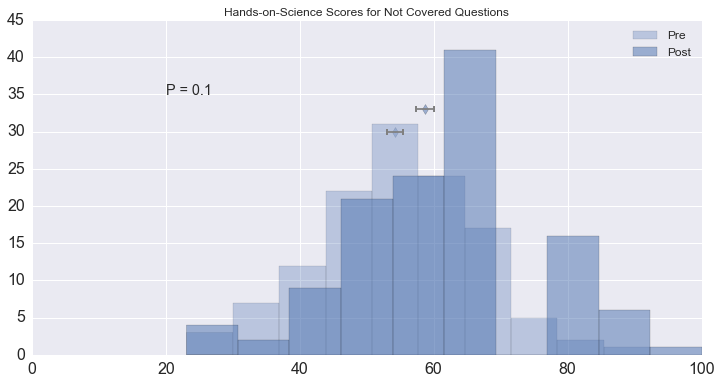

In [40]:
#ok to ignore not covered?
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
palette = sns.color_palette()
col = palette[0]
prey = 30
posty = 33

prenotcov.hist(alpha=0.3,color=col,label='Pre',bins=10)
postnotcov.hist(alpha=0.5,color=col,label='Post',bins=10)
#plot means
ax.scatter(prenotcov.mean(),prey,marker='d',s=50,c=col,alpha=0.3)
ax.scatter(postnotcov.mean(),posty,marker='d',s=50,c=col,alpha=0.5)
#plot stderrs
preerr = prenotcov.std()/np.sqrt(len(hospre27))
posterr = postnotcov.std()/np.sqrt(len(hospost27))
ax.errorbar(prenotcov.mean(), prey, xerr=preerr, fmt='.',markersize=1,c='gray',capthick=2)
ax.errorbar(postnotcov.mean(), posty, xerr=posterr, fmt='.',markersize=1,c='gray',capthick=2)
#plot KS prob
KShos = ks_2samp(prenotcov,postnotcov)
KSstr = 'P = %.1g' % KShos[1]
ax.text(20,35,KSstr,fontsize='x-large')

ax.set_xlim(xmin=0, xmax=100)
ax.set_ylim(ymin=0, ymax=45)
ax.tick_params(labelsize=16)
ax.set_title('Hands-on-Science Scores for Not Covered Questions',fontsize='large')
ax.legend(fontsize='large')
fig.savefig('qNOTcovhoshist.pdf')

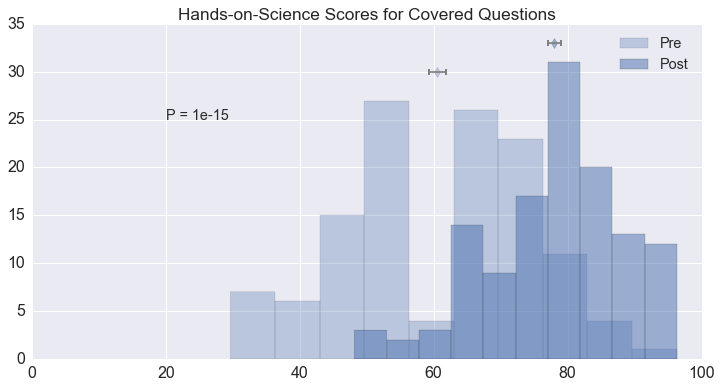

In [41]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
palette = sns.color_palette()
col = palette[0]
prey = 30
posty = 33

hospre27.hist(alpha=0.3,color=col,label='Pre',bins=10)
hospost27.hist(alpha=0.5,color=col,label='Post',bins=10)
#plot means
ax.scatter(hospre27.mean(),prey,marker='d',s=50,c=col,alpha=0.3)
ax.scatter(hospost27.mean(),posty,marker='d',s=50,c=col,alpha=0.5)
#plot stderrs
preerr = hospre27.std()/np.sqrt(len(hospre27))
posterr = hospost27.std()/np.sqrt(len(hospost27))
ax.errorbar(hospre27.mean(), prey, xerr=preerr, fmt='.',markersize=1,c='gray',capthick=2)
ax.errorbar(hospost27.mean(), posty, xerr=posterr, fmt='.',markersize=1,c='gray',capthick=2)
#plot KS prob
KShos = ks_2samp(hospre27,hospost27)
KSstr = 'P = %.1g' % KShos[1]
ax.text(20,25,KSstr,fontsize='x-large')

ax.set_xlim(xmin=0, xmax=100)
ax.set_ylim(ymin=0, ymax=35)
ax.tick_params(labelsize=16)
ax.set_title('Hands-on-Science Scores for Covered Questions',fontsize='xx-large')
ax.legend(fontsize='x-large')
fig.savefig('q27hoshist.pdf')

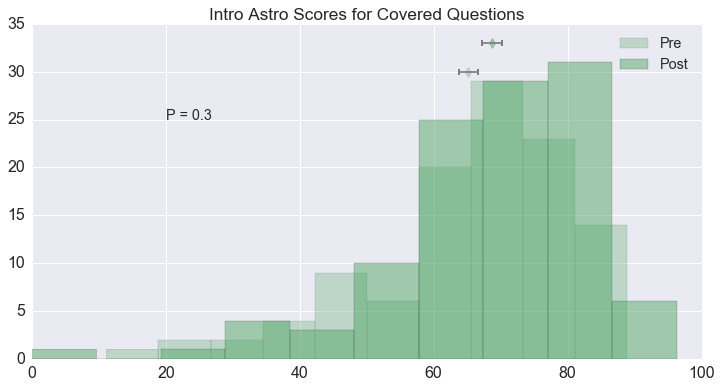

In [42]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
palette = sns.color_palette()
col = palette[1]
prey = 30
posty = 33

astpre27.hist(alpha=0.3,color=col,label='Pre',bins=10)
astpost27.hist(alpha=0.5,color=col,label='Post',bins=10)
#plot means
ax.scatter(astpre27.mean(),prey,marker='d',s=50,c=col,alpha=0.3)
ax.scatter(astpost27.mean(),posty,marker='d',s=50,c=col,alpha=0.5)
#plot stderrs
preerr = astpre27.std()/np.sqrt(len(astpre27))
posterr = astpost27.std()/np.sqrt(len(astpost27))
ax.errorbar(astpre27.mean(), prey, xerr=preerr, fmt='.',markersize=1,c='gray',capthick=2)
ax.errorbar(astpost27.mean(), posty, xerr=posterr, fmt='.',markersize=1,c='gray',capthick=2)
#plot KS prob
KS = ks_2samp(astpre27,astpost27)
KSstr = 'P = %.1g' % KS[1]
ax.text(20,25,KSstr,fontsize='x-large')

ax.set_xlim(xmin=0, xmax=100)
ax.set_ylim(ymin=0, ymax=35)
ax.tick_params(labelsize=16)
ax.set_title('Intro Astro Scores for Covered Questions',fontsize='xx-large')
ax.legend(fontsize='x-large')
fig.savefig('q27asthist.pdf')

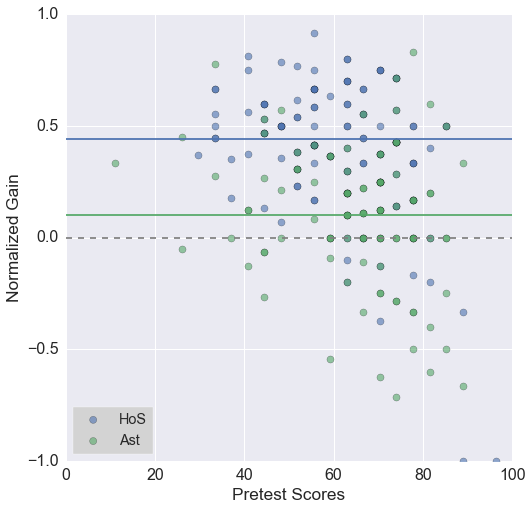

In [43]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
palette = sns.color_palette()
col = palette[1]
prey = 30
posty = 29

#plot individual <g>
ghos27 = (hospost27-hospre27)/(100-hospre27)
gast27 = (astpost27-astpre27)/(100-astpre27)
ax.scatter(hospre27,ghos27,marker='o',s=50,c=palette[0],alpha=0.6,label='HoS')
ax.scatter(astpre27,gast27,marker='o',s=50,c=palette[1],alpha=0.6,label='Ast')
#plot mean <g> per sample

ax.axhline(0,color='gray',ls='--')
ax.axhline((hospost27.mean()-hospre27.mean())/(100-hospre27.mean()),color=palette[0],ls='-')
ax.axhline((astpost27.mean()-astpre27.mean())/(100-astpre27.mean()),color=palette[1],ls='-')

ax.set_xlim(xmin=0, xmax=100)
ax.set_ylim(ymin=-1, ymax=1)
ax.tick_params(labelsize=16)
ax.set_xlabel('Pretest Scores',fontsize='xx-large')
ax.set_ylabel('Normalized Gain',fontsize='xx-large')
legend = ax.legend(loc='lower left',fontsize='x-large',frameon=True)
frame = legend.get_frame()
frame.set_facecolor('lightgray')
fig.savefig('q27g.pdf')

In [45]:
print((hospost27.mean()-hospre27.mean())/(100-hospre27.mean()), (astpost27.mean()-astpre27.mean())/(100-astpre27.mean()))

0.4432677760968216 0.10154738878143134


# Monte Carlo of Pre-tests

In [46]:
pre27 = DataFrame(hospre27)
pre27['Class']='HoS'

tempast = DataFrame(astpre27)
tempast['Class']='Ast'

totpre27 = pd.concat([pre27,tempast])
totpre27.columns = ['Pretest','Class']
totpre27.head()

,Pretest,Class
720593,44.444444,HoS
304917,62.962963,HoS
709488,81.481481,HoS
743883,62.962963,HoS
890246,77.777778,HoS


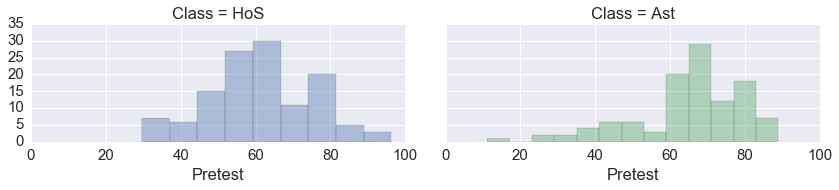

In [52]:
sns.set(font_scale=1.5)
#fig = sns.FacetGrid(totdf, hue='Class', aspect=2)
fig = sns.FacetGrid(totpre27, col='Class',hue='Class', aspect=2)
fig.map(sns.distplot, 'Pretest',kde=False)
#fig.map(sns.distplot, 'Pre100',kde=False)
KS = ks_2samp(hospre27,astpre27)
KSstr = 'P = %.1g' % KS[1]
#plt.text(20,25,KSstr,fontsize='small')

fig.set(xlim=(0,100))
fig.set(ylim=(0,35))
#plt.title('Distribution of Pre-test Scores',fontsize='medium')
#fig.add_legend()
fig.savefig('Predists.pdf')

In [143]:
print(hospre27.mean(),astpre27.mean())
print(hospost27.mean(),astpost27.mean())

60.513739545997595 65.18518518518518
78.01672640382311 68.72053872053871


In [144]:
print(hosprecov2.mean(),astprecov2.mean())
print(hospostcov2.mean(),astpostcov2.mean())

61.162988115449885 69.71291866028703
81.91850594227508 73.87559808612441


# Dually covered Qs

In [95]:
# [1,2,5,6,7,9,10,12,13,14,15,16,17,18,19,20,21,23,24] in 27Q numbering
cov2orig = [1,2,7,9,10,12,13,16,17,18,19,20,21,24,25,26,27,29,33]
cov2 = []
for Q in cov2orig: 
    cov2.append(Q-1)
astprecov2 = astpredf[cov2].sum(axis=1)/len(cov2)*100
astpostcov2 = astpostdf[cov2].sum(axis=1)/len(cov2)*100
hosprecov2 = hospredf[cov2].sum(axis=1)/len(cov2)*100
hospostcov2 = hospostdf[cov2].sum(axis=1)/len(cov2)*100

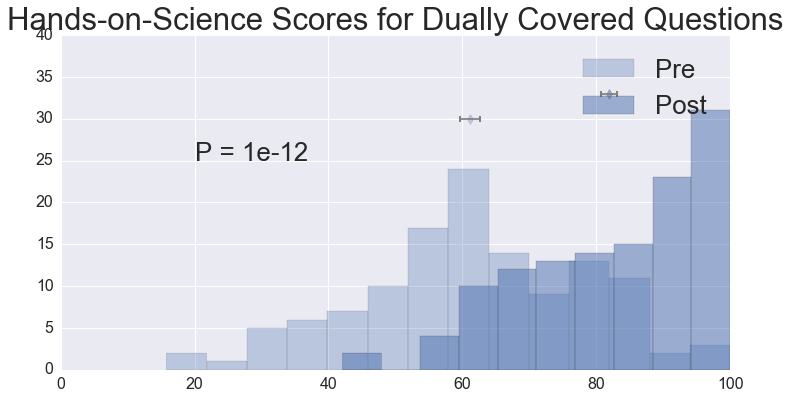

In [96]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
palette = sns.color_palette()
col = palette[0]
prey = 30
posty = 33

hosprecov2.hist(alpha=0.3,color=col,label='Pre',bins=14)
hospostcov2.hist(alpha=0.5,color=col,label='Post',bins=10)
#plot means
ax.scatter(hosprecov2.mean(),prey,marker='d',s=50,c=col,alpha=0.3)
ax.scatter(hospostcov2.mean(),posty,marker='d',s=50,c=col,alpha=0.5)
#plot stderrs
preerr = hosprecov2.std()/np.sqrt(len(hosprecov2))
posterr = hospostcov2.std()/np.sqrt(len(hospostcov2))
ax.errorbar(hosprecov2.mean(), prey, xerr=preerr, fmt='.',markersize=1,c='gray',capthick=2)
ax.errorbar(hospostcov2.mean(), posty, xerr=posterr, fmt='.',markersize=1,c='gray',capthick=2)
#plot KS prob
KS = ks_2samp(hosprecov2,hospostcov2)
KSstr = 'P = %.1g' % KS[1]
ax.text(20,25,KSstr,fontsize='x-large')

ax.set_xlim(xmin=0, xmax=100)
ax.set_ylim(ymin=0, ymax=40)
ax.tick_params(labelsize=16)
ax.set_title('Hands-on-Science Scores for Dually Covered Questions',fontsize='xx-large')
ax.legend(fontsize='x-large')
fig.savefig('qCov2hoshist.pdf')

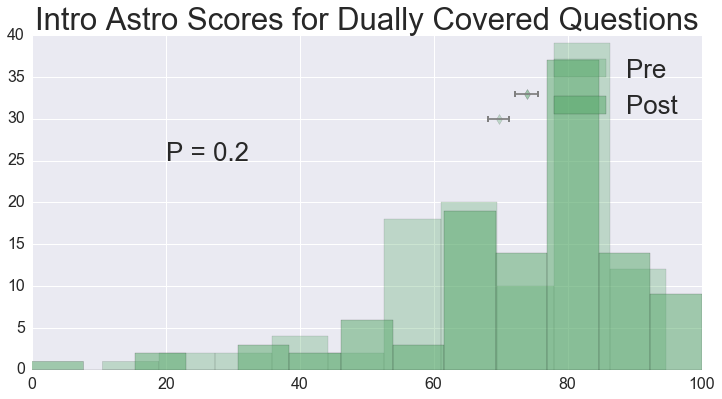

In [97]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
palette = sns.color_palette()
col = palette[1]
prey = 30
posty = 33

astprecov2.hist(alpha=0.3,color=col,label='Pre',bins=10)
astpostcov2.hist(alpha=0.5,color=col,label='Post',bins=13)
#plot means
ax.scatter(astprecov2.mean(),prey,marker='d',s=50,c=col,alpha=0.3)
ax.scatter(astpostcov2.mean(),posty,marker='d',s=50,c=col,alpha=0.5)
#plot stderrs
preerr = astprecov2.std()/np.sqrt(len(astprecov2))
posterr = astpostcov2.std()/np.sqrt(len(astpostcov2))
ax.errorbar(astprecov2.mean(), prey, xerr=preerr, fmt='.',markersize=1,c='gray',capthick=2)
ax.errorbar(astpostcov2.mean(), posty, xerr=posterr, fmt='.',markersize=1,c='gray',capthick=2)
#plot KS prob
KS = ks_2samp(astprecov2,astpostcov2)
KSstr = 'P = %.1g' % KS[1]
ax.text(20,25,KSstr,fontsize='x-large')

ax.set_xlim(xmin=0, xmax=100)
ax.set_ylim(ymin=0, ymax=40)
ax.tick_params(labelsize=16)
ax.set_title('Intro Astro Scores for Dually Covered Questions',fontsize='xx-large')
ax.legend(fontsize='x-large')
fig.savefig('qCov2asthist.pdf')

In [98]:
hosprecov2Q = hospredf[cov2].sum(axis=0)/len(hospredf)
hospostcov2Q = hospostdf[cov2].sum(axis=0)/len(hospostdf)
astprecov2Q = astpredf[cov2].sum(axis=0)/len(astpredf)
astpostcov2Q = astpostdf[cov2].sum(axis=0)/len(astpostdf)

In [99]:
cov2

[0, 1, 6, 8, 9, 11, 12, 15, 16, 17, 18, 19, 20, 23, 24, 25, 26, 28, 32]

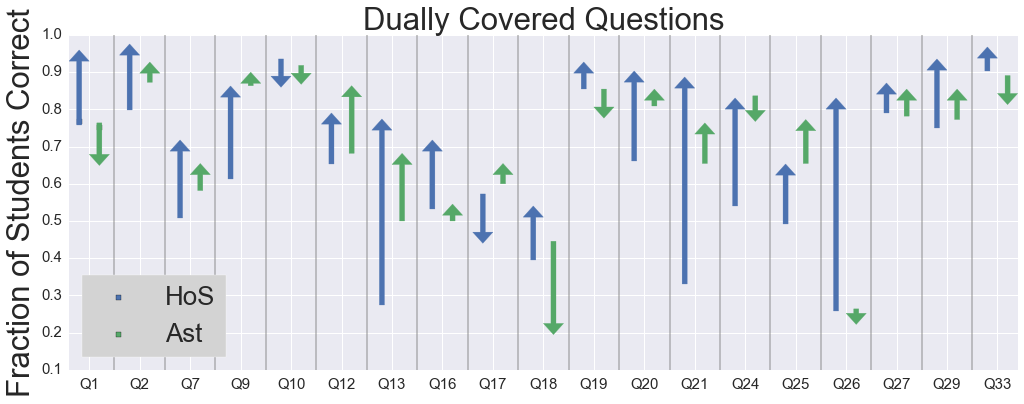

In [100]:
fig = plt.figure(figsize=(17,6))
ax = fig.add_subplot(111)
palette = sns.color_palette()
col1 = palette[0]
col2 = palette[1]

#ax.scatter(cov2,hosprecov2Q,marker='s',s=20,c=palette[0],alpha=0.3,label='HoS')
ax.scatter(-0.2,hosprecov2Q[cov2[0]]+0.01,marker='s',s=25,c=palette[0],label='HoS')
ax.scatter(0.2,astprecov2Q[cov2[0]]-0.01,marker='s',s=25,c=palette[1],label='Ast')

Qstr = []
for i in range(len(cov2)):
    Qnum = cov2[i]
    Qstr.append('Q'+str(cov2[i]+1))
    diff = hospostcov2Q[Qnum]-hosprecov2Q[Qnum]
    ax.arrow(i-0.2,hosprecov2Q[Qnum],0,diff-0.03,head_width=0.4,head_length=0.03,fc=col1, ec=col1,width=.10,label='HoS')
    diffA = astpostcov2Q[Qnum]-astprecov2Q[Qnum]
    ax.arrow(i+0.2,astprecov2Q[Qnum],0,diffA-0.03,head_width=0.4,head_length=0.03,fc=col2,ec=col2,width=.10,label='Ast')
    ax.axvline(0.5+i,color='gray',ls='-',alpha=0.5)

ax.set_xlim(-0.4,18.4)
ax.set_ylim(0.1,1)
ax.set_title('Dually Covered Questions',fontsize='xx-large')
ax.set_ylabel('Fraction of Students Correct',fontsize='xx-large')
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = '0'
labels[1:] = Qstr

ax.xaxis.set_major_locator(MaxNLocator(len(Qstr)+2))
ax.set_xticklabels(labels)
legend = ax.legend(loc='lower left',fontsize='x-large',frameon=True)
frame = legend.get_frame()
frame.set_facecolor('lightgray')
fig.savefig('qCov2.pdf')

# Topic Analysis

In [101]:
hospredf['Class']='HoS'
hospostdf['Class']='HoS'
astpredf['Class']='Ast'
astpostdf['Class']='Ast'
totpre = pd.concat([hospredf,astpredf])
totpost = pd.concat([hospostdf,astpostdf])

In [102]:
chpre = DataFrame(totpre[light].sum(axis=1)/len(light),columns=['Light'],index=totpre.index)
chpre['Scale'] = totpre[scale].sum(axis=1)/len(scale)
chpre['Sky'] = totpre[sky].sum(axis=1)/len(sky)
chpre['Seasons'] = totpre[seasons].sum(axis=1)/len(seasons)
chpre['Phases'] = totpre[phases].sum(axis=1)/len(phases)
chpre['Weather'] = totpre[weather].sum(axis=1)/len(weather)
chpre['Class'] = totpre['Class']
chpost = DataFrame(totpost[light].sum(axis=1)/len(light),columns=['Light'],index=totpre.index)
chpost['Scale'] = totpost[scale].sum(axis=1)/len(scale)
chpost['Sky'] = totpost[sky].sum(axis=1)/len(sky)
chpost['Seasons'] = totpost[seasons].sum(axis=1)/len(seasons)
chpost['Phases'] = totpost[phases].sum(axis=1)/len(phases)
chpost['Weather'] = totpost[weather].sum(axis=1)/len(weather)
chpost['Class'] = totpost['Class']

In [135]:
chpre[chpre['Class']=='HoS'].shape

(124, 7)

In [104]:
Hpremeans = [chpre[chpre.Class=='HoS']['Light'].mean(),
            chpre[chpre.Class=='HoS']['Scale'].mean(),
            chpre[chpre.Class=='HoS']['Sky'].mean(),
            chpre[chpre.Class=='HoS']['Seasons'].mean(),
            chpre[chpre.Class=='HoS']['Phases'].mean(),
            chpre[chpre.Class=='HoS']['Weather'].mean()]
Hpostmeans = [chpost[chpost.Class=='HoS']['Light'].mean(),
              chpost[chpost.Class=='HoS']['Scale'].mean(),
              chpost[chpost.Class=='HoS']['Sky'].mean(),
              chpost[chpost.Class=='HoS']['Seasons'].mean(),
              chpost[chpost.Class=='HoS']['Phases'].mean(),
              chpost[chpost.Class=='HoS']['Weather'].mean()]
Apremeans = [chpre[chpre.Class=='Ast']['Light'].mean(),
            chpre[chpre.Class=='Ast']['Scale'].mean(),
            chpre[chpre.Class=='Ast']['Sky'].mean(),
            chpre[chpre.Class=='Ast']['Seasons'].mean(),
            chpre[chpre.Class=='Ast']['Phases'].mean(),
            chpre[chpre.Class=='Ast']['Weather'].mean()]
Apostmeans = [chpost[chpost.Class=='Ast']['Light'].mean(),
              chpost[chpost.Class=='Ast']['Scale'].mean(),
              chpost[chpost.Class=='Ast']['Sky'].mean(),
              chpost[chpost.Class=='Ast']['Seasons'].mean(),
              chpost[chpost.Class=='Ast']['Phases'].mean(),
              chpost[chpost.Class=='Ast']['Weather'].mean()]
ch = range(6)

In [133]:
len(Hpostmeans)

6

In [105]:
print(chpost[chpost.Class=='HoS']['Light'].std()/np.sqrt(len(chpre[chpre.Class=='HoS'])),
chpost[chpost.Class=='HoS']['Scale'].std()/np.sqrt(len(chpre[chpre.Class=='HoS'])),
chpost[chpost.Class=='HoS']['Sky'].std()/np.sqrt(len(chpre[chpre.Class=='HoS'])),
chpost[chpost.Class=='HoS']['Seasons'].std()/np.sqrt(len(chpre[chpre.Class=='HoS'])),
chpost[chpost.Class=='HoS']['Phases'].std()/np.sqrt(len(chpre[chpre.Class=='HoS'])),
chpost[chpost.Class=='HoS']['Weather'].std()/np.sqrt(len(chpre[chpre.Class=='HoS'])))

0.018306033923 0.0148666767997 0.014294510672 0.0158275284343 0.0200618779061 0.0219421400829


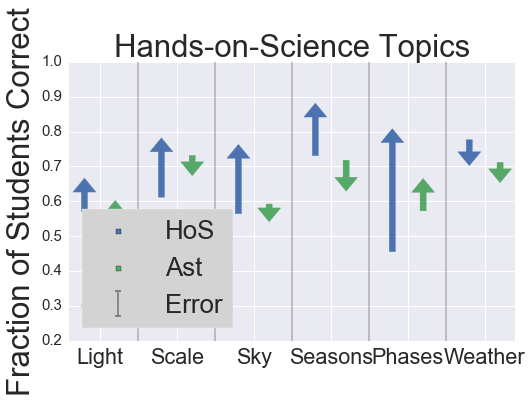

In [106]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
palette = sns.color_palette()
col1 = palette[0]
col2 = palette[1]

#plot arrows
Qstr = ['Light','Scale','Sky','Seasons','Phases','Weather']
for i in range(len(Qstr)):
    diff = Hpostmeans[i]-Hpremeans[i]
    ax.arrow(i-0.2,Hpremeans[i],0,diff-0.04,head_width=0.3,head_length=0.04,fc=col1, ec=col1,width=.08)
    diffA = Apostmeans[i]-Apremeans[i]
    ax.arrow(i+0.2,Apremeans[i],0,diffA-0.04,head_width=0.3,head_length=0.04,fc=col2,ec=col2,width=.08)
    ax.axvline(0.5+i,color='gray',ls='-',alpha=0.5)

#to create label for legend
ax.scatter(-0.2,0.3,marker='s',s=25,c=palette[0],label='HoS')
ax.scatter(0.2,0.3,marker='s',s=25,c=palette[1],label='Ast')

#typical error HoS ~ 0.02
ax.errorbar(0, 0.3, yerr=0.02, fmt='.',markersize=1,c='gray',capthick=2,label='Error')
ax.set_xlim(-0.4,5.4)
ax.set_ylim(0.2,1)
ax.set_title('Hands-on-Science Topics',fontsize='xx-large')
ax.set_ylabel('Fraction of Students Correct',fontsize='xx-large')
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = '0'
labels[1:] = Qstr

ax.xaxis.set_major_locator(MaxNLocator(len(Qstr)+1))
ax.set_xticklabels(labels,rotation=0,fontsize='large')
legend = ax.legend(loc='lower left',fontsize='x-large',frameon=True)
frame = legend.get_frame()
frame.set_facecolor('lightgray')
fig.savefig('Topics.pdf')